In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Model, load_model
from keras.datasets import cifar10
from keras.regularizers import l1, l2
from keras.optimizers import Adam, SGD
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load and Preprocess the dataset

In [2]:
# load the dataset
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

170500096/170498071 [==============================] - 6s 0us/step


# Define the model

In [3]:
input_layer = x_train.shape[1]
hid_layer4 = 128
output_layer = input_layer
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [4]:
input_img = Input(shape=(input_layer,))

In [5]:
# network architecture
# vanilla autoencoder with fully-connected layer
# ENCODER

encoded = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-7))(input_img)

decoded = Dense(units = output_layer, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer= Adam(lr = 1e-5), loss='mean_squared_error')

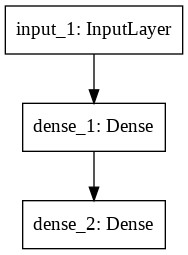

In [6]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png')

In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              396288    
Total params: 789,632
Trainable params: 789,632
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [8]:
# train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.0718 - val_loss: 0.0705
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.0704 - val_loss: 0.0697
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0664 - val_loss: 0.0641
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0625 - val_loss: 0.0606
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.0595 - val_loss: 0.0580
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0571 - val_loss: 0.0558
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0550 - val_loss: 0.0538
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0532 - val_loss: 0.0521
Ep

dict_keys(['val_loss', 'loss'])


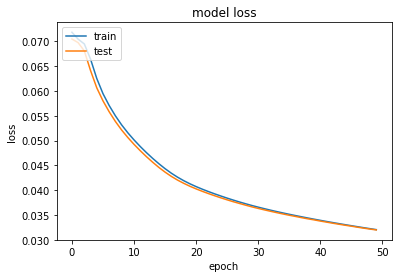

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

autoencoder.save('/content/gdrive/My Drive/autoencoder_simple_nlp.h5')

# (Optional) Load Pre-Trained Model

In [0]:
from keras.models import load_model
from google.colab import drive

drive.mount('/content/gdrive')
autoencoder = load_model('/content/gdrive/My Drive/checkpoints/autoencoder_simple_nlp.h5')
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer(index = 4).output)

In [10]:
score = autoencoder.evaluate(x_test,x_test, verbose = 1)
score

10000/10000 [==============================] - 0s 49us/step


0.028968310856819154

# Reconstruction Results

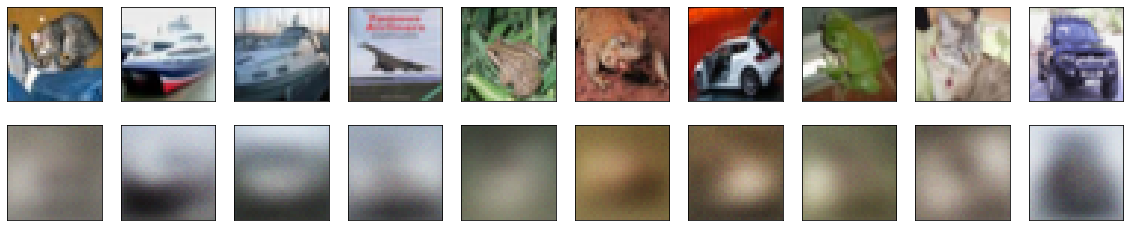

In [11]:
# show the result at the decoder output
decoded_imgs = autoencoder.predict(x_test)

counter = 0
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[counter + i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[counter + i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

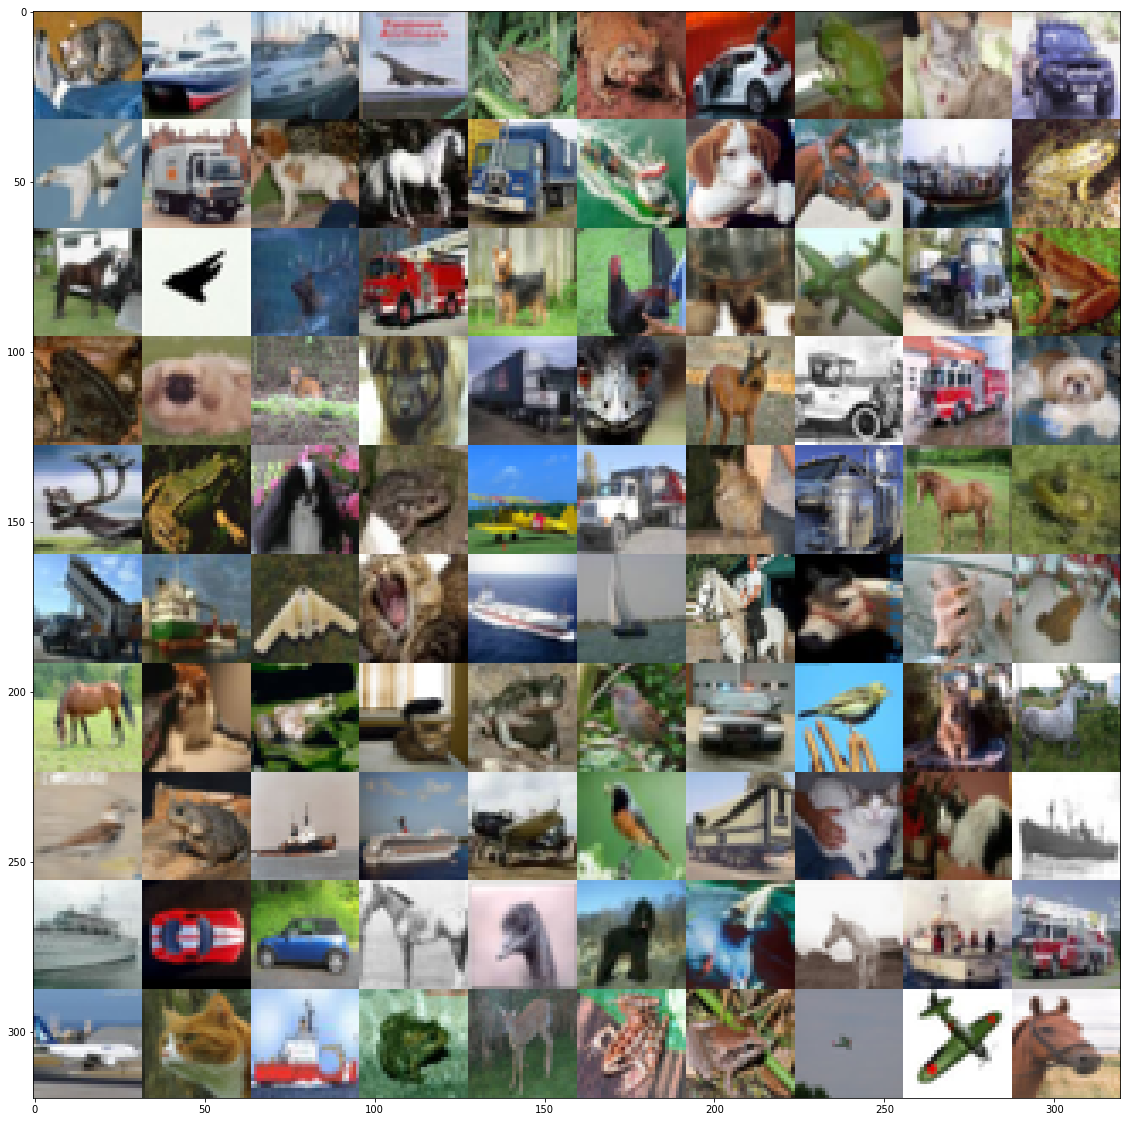

In [12]:
# display test images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
test_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      #test_imgs[:,:,0] = xtest_red[counter].reshape(32, 32)
      #test_imgs[:,:,1] = xtest_green[counter].reshape(32, 32)
      #test_imgs[:,:,2] = xtest_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = x_test[counter].reshape(32,32,3)
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

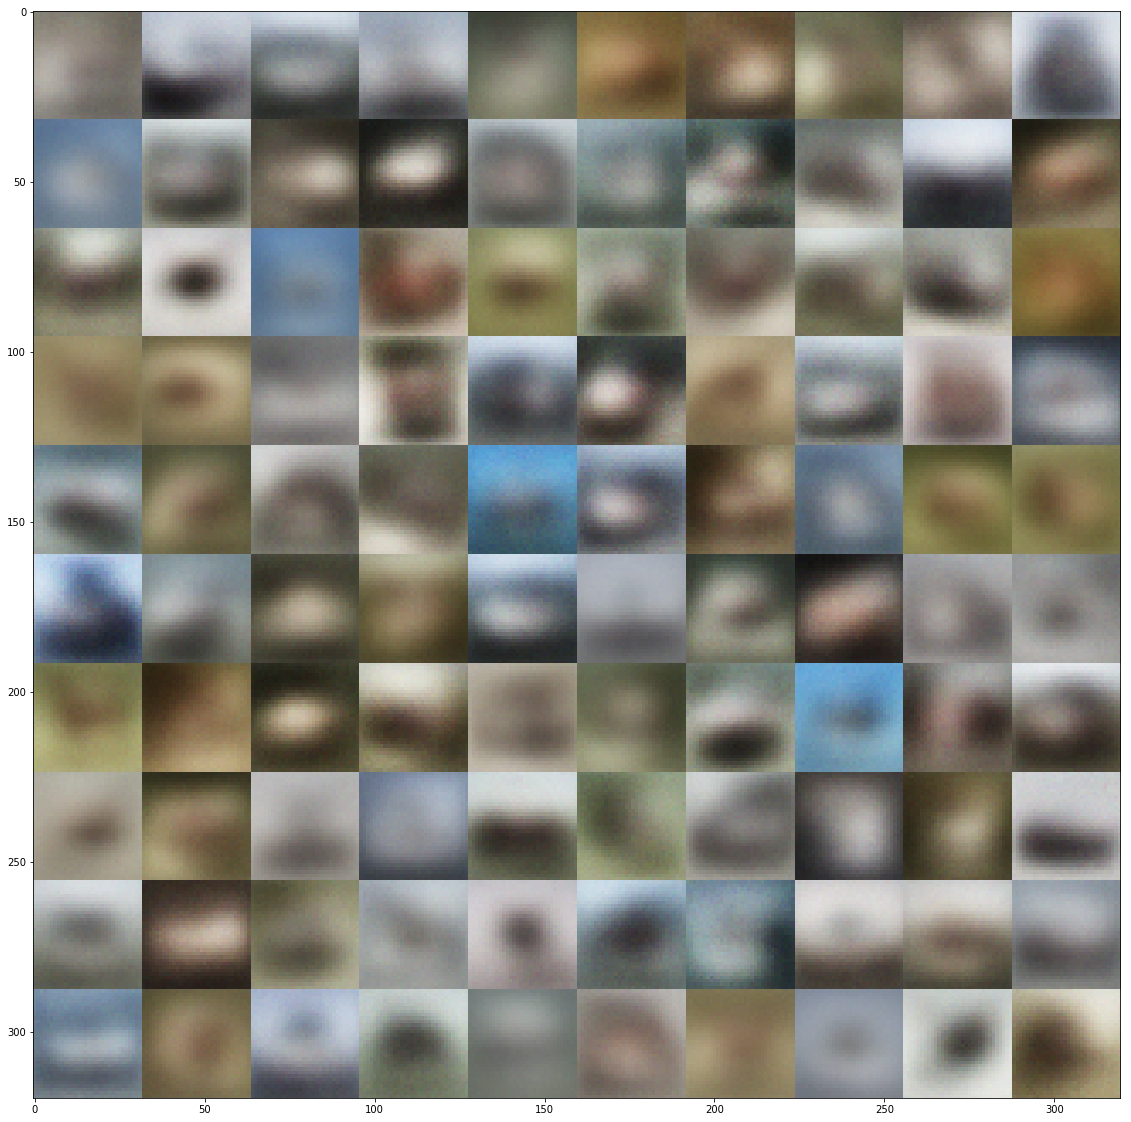

In [13]:
# display reconstructed images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
dec_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      #dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
      #dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
      #dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = decoded_imgs[counter].reshape(32,32,3)
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

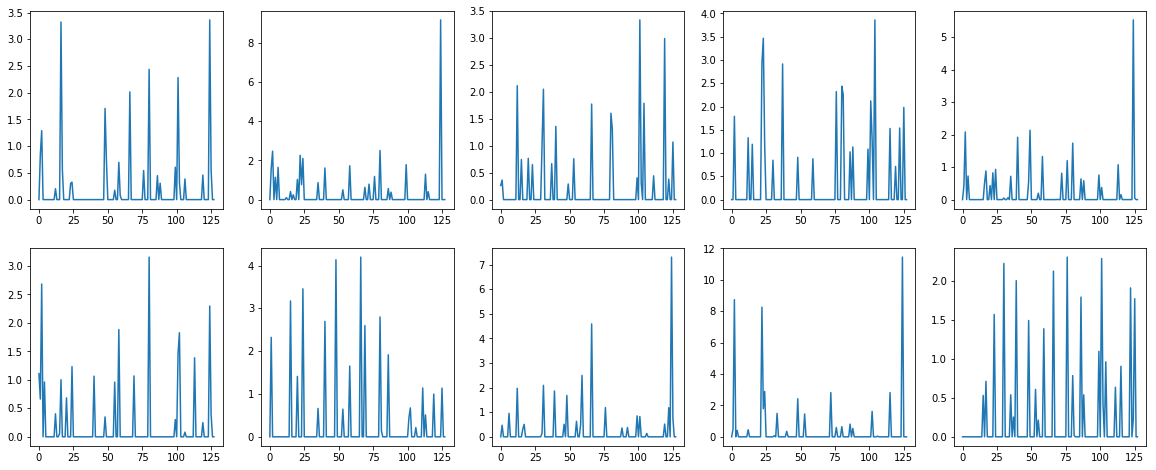

In [14]:
# show the representation at the bottleneck
encoded_imgs = encoder.predict(x_test)

counter = 10
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()